# Lab 3 - Part 1: Classification and Grid Search (33 marks)
### Due Date: Monday, March 13 at 12pm

Author: *Kunj Patel*

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

The purpose of this portion of the assignment is to practice following the grid-search workflow: 
- Split data into training and test set
- Use the training portion to find the best model using grid search and cross-validation
- Retrain the best model
- Evaluate the retrained model on the test set

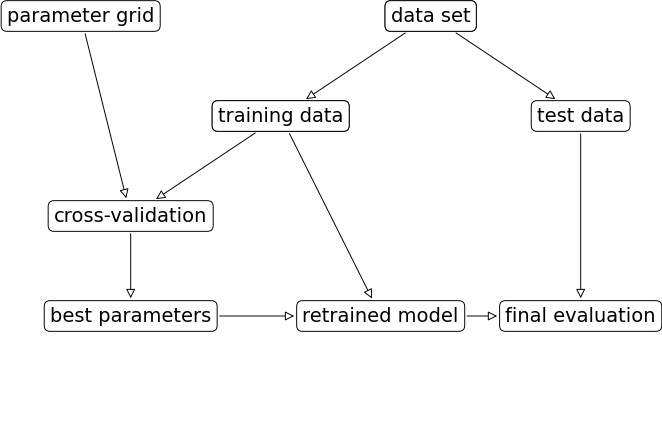

In [2]:
import mglearn
mglearn.plots.plot_grid_search_overview()

## 0. Function definitions (2 marks)

In [3]:
from sklearn.model_selection import cross_validate


def get_classifier_cv_score(model, X, y, scoring='accuracy', cv=7):
    '''Calculate train and validation scores of classifier (model) using cross-validation
        
        
        model (sklearn classifier): Classifier to train and evaluate
        X (numpy.array or pandas.DataFrame): Feature matrix
        y (numpy.array or pandas.Series): Target vector
        scoring (str): a scoring string accepted by sklearn.metrics.cross_validate()
        cv (int): number of cross-validation folds see sklearn.metrics.cross_validate()
        
        returns: mean training score, mean validation score
    
    '''
    
    
    #TODO: Implement function body
        
        
    score = cross_validate(estimator=model, X=X, y=y,
                           cv=cv, scoring=scoring, return_train_score=True)
    score_train = score['train_score'].mean()
    score_test = score['test_score'].mean()

    return (score_train, score_test)
    

In [4]:
# DO NOT NEED TO ADD ANYTHING TO THIS FUNCTION
def print_grid_search_result(grid_search):
    '''Prints summary of best model from GridSearchCV object.
    
        For the best model of the grid search, print:
        - parameters 
        - cross-validation training score
        - cross-validation validation score 
        
        scores are printed with 3 decimal places
    
        grid_search (sklearn GridSearchCV): Fitted GridSearchCV object
        
        returns: None
        
    '''
    
    print(grid_search.best_params_)
    print("training score= {:.3f}; validation score={:.3f}".format(grid_search.cv_results_['mean_train_score'][grid_search.best_index_],
                                                                  grid_search.cv_results_['mean_test_score'][grid_search.best_index_]))


In [5]:
# DO NOT NEED TO ADD ANYTHING TO THIS FUNCTION
import mglearn

def plot_grid_search_results(grid_search):
    '''For grids with 2 hyperparameters, create a heatmap plot of test scores
        
        grid_search (sklearn GridSearchCV): Fitted GridSearchCV object
        
        uses mglearn.tools.heatmap() for plotting
    
    '''
    results = pd.DataFrame(grid_search.cv_results_)

    params = sorted(grid_search.param_grid.keys())
    
    assert len(params) == 2, "We can only plot two parameters."
    
    # second dimension in reshape are rows, needs to be the fast changing parameter
    scores = np.array(results.mean_test_score).reshape(len(grid_search.param_grid[params[0]]),
                                                      len(grid_search.param_grid[params[1]]))

    # plot the mean cross-validation scores
    # x-axis needs to be the fast changing parameter
    mglearn.tools.heatmap(scores, 
                          xlabel=params[1], 
                          xticklabels=grid_search.param_grid[params[1]], 
                          ylabel=params[0], 
                          yticklabels=grid_search.param_grid[params[0]],
                          cmap="viridis", fmt="%0.3f")

In [6]:
# DO NOT NEED TO ADD ANYTHING TO THIS FUNCTION
from sklearn.metrics import confusion_matrix

def plot_confusion_matrix(y_actual, y_pred, labels, title):
    '''Creates a heatmap plot of the confusion matrix.
    
        y_actual (pandas.DataSeries or numpy.Array): Ground truth label vector
        y_pred (pandas.DataSeries or numpy.Array): Predicted label vector
        labels (list(str)): Class names used for plotting (ticklabels)
        title (str): Plot title
        
        uses sklearn.metrics.confusion_matrix
        
    '''
    
    mat = confusion_matrix(y_actual, y_pred)

    sns.heatmap(mat, 
                xticklabels=labels,  
                yticklabels=labels, 
                square=True, annot=True, cbar=False, 
                fmt='d')
    plt.xlabel('predicted value')
    plt.ylabel('true value')
    plt.title(title)

## 1. Load data (2 marks)
yellowbrick mushroom  
https://www.scikit-yb.org/en/latest/api/datasets/mushroom.html




### 1.1 Prepare the feature matrix and target vector

Using the yellowbrick `load_mushroom()` function, load the mushroom data set into feature matrix `X` and target vector `y`

Print shape and type of `X`, `y`

In [7]:
# TODO: Add data loading code

from yellowbrick.datasets import load_mushroom
X, y = load_mushroom()

print("Type of X = {}, Shape of X = {}".format(type(X), X.shape))
print("Type of y = {}, Shape of y = {}".format(type(X), y.shape))

Type of X = <class 'pandas.core.frame.DataFrame'>, Shape of X = (8123, 3)
Type of y = <class 'pandas.core.frame.DataFrame'>, Shape of y = (8123,)


## 2. Preprocessing (4 marks)
In this dataset, all features are discrete and nominal and need to be encoded. We will use a `OneHotEncoder`

The target vector is discrete and nominal as well and contains string labels. While sklearn is OK using string labels in target vectors, you will use a `LabelEncoder` explicitly to convert strings to integers and keep the encoder to translate between the two representations

### 2.1 Onehot encoding of features
Use `OneHotEncoder` to convert `X` into one-hot-encoded features stored in a variable `X_enc`. Use `sparse=False`. Print shape of `X_enc`

In [8]:
# TODO: Add OneHotEncoder here
from sklearn.preprocessing import OneHotEncoder
encoder_onehot = OneHotEncoder(sparse=False)
X_enc = encoder_onehot.fit(X).transform(X)

print(X_enc.shape)

(8123, 20)


### 2.2 Label encode target vector 
Use `LabelEncoder` to encode the target vector `y`, saved in a variable `y_enc`

Print the resulting target vector `y_enc` and print the class names available in the `classes_` attribute of the `LabelEncoder` object

In [9]:
# TODO: Add LabelEncoder here
from sklearn.preprocessing import LabelEncoder
encoder_label = LabelEncoder()
y_enc = encoder_label.fit(y).transform(y)

print("Encoded Target =", y_enc)
print("Class Names    =", encoder_label.classes_)

Encoded Target = [0 0 1 ... 0 1 0]
Class Names    = ['edible' 'poisonous']


## 3. Create training and test sets (1 mark)
Using scikit-learn `train_test_split()` with parameters `random_state=37`, `test_size=0.2`, split `X_enc` and `y_enc` into training and test sets

In [10]:
# TODO: Add train_test_split() here
from sklearn.model_selection import train_test_split

# split the data into training set and validation set
X_train, X_test, y_train, y_test = train_test_split(X_enc, y_enc, random_state=37, test_size=0.2)

## 4. Compare models using cross-validation (4 marks)
Create a list containing `LogisticRegression()`, 
          `SVC()`,
          `BernoulliNB()`,
        `RandomForestClassifier(random_state=55)`, 
         `GradientBoostingClassifier(random_state=56)` objects.

Iterate this list, then:
- Compute the **f1 score** using `get_classifier_cv_score()` with the 7-fold cross-validation defined above with `X_train` and `y_train` as arguments
- Print the models' training and validation scores with **3 decimal places**

In [11]:
# TODO: Add cross-validation comparison here
from sklearn.model_selection import cross_validate


def get_classifier_cv_score(model, X, y, scoring='accuracy', cv=7):
    '''Calculate train and validation scores of classifier (model) using cross-validation
        
        
        model (sklearn classifier): Classifier to train and evaluate
        X (numpy.array or pandas.DataFrame): Feature matrix
        y (numpy.array or pandas.Series): Target vector
        scoring (str): a scoring string accepted by sklearn.metrics.cross_validate()
        cv (int): number of cross-validation folds see sklearn.metrics.cross_validate()
        
        returns: mean training score, mean validation score
    
    '''
    
    
    #TODO: Implement function body
        
        
    score = cross_validate(estimator=model, X=X, y=y,
                           cv=cv, scoring=scoring, return_train_score=True)
    score_train = score['train_score'].mean()
    score_test = score['test_score'].mean()

    return (score_train, score_test)
    
# TODO: Add cross-validation comparison here
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import BernoulliNB
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier

# model list
model_list = [LogisticRegression(), SVC(), BernoulliNB(), RandomForestClassifier(
    random_state=55), GradientBoostingClassifier(random_state=56)]

result_list = []

# iterate over the models to get the train and test score and store in results list
for m in model_list:
    (score_train, score_test) = get_classifier_cv_score(m, X_train, y_train, scoring='average_precision')
    result_list.append((m.__class__.__name__, score_train, score_test))


# sort the list based on test score
result_list.sort(key = lambda item: item[2], reverse=True)


# print the models
print(" model name                  train_score  test_score ")
for r in result_list:
    print(" {:<26}  {:11.3f}  {:10.3f} ".format(r[0], r[1], r[2]))


 model name                  train_score  test_score 
 RandomForestClassifier            0.806       0.792 
 GradientBoostingClassifier        0.793       0.788 
 SVC                               0.710       0.699 
 BernoulliNB                       0.669       0.667 
 LogisticRegression                0.661       0.658 


## 5. Hyperparameter tuning using grid search (8 marks)

The inital cross-validation above gives us an idea of how algorithms perfom using their default hyperparameters

Next, we will try and improve one model by tuning its hyperparameters using grid search

### 5.1 Grid search for RandomForestClassifier 

Perform grid search using `GridSearchCV` for the `RandomForestClassifier(n_estimators=300, random_state=55)`:

- Set the number of trees `n_estimators=300` for all evaluations
- Grid search using 7-fold cross-validation and `f1` as the scoring function 
- Note that there is a `n_jobs` parameter to run search in parallel. Setting it to the number of CPU cores  or -1 works well

Use the following hyperparameters and values:
- `'max_depth': [3, 5, 8]`
- `'max_features': [0.3, 0.5, 0.7, 0.9]`

From sklearn help:
> - max_depth: The maximum depth of the tree
> - max_features: If float, then max_features is a fraction and max(1, int(max_features * n_features)) features are considered at each split


Use the `print_grid_search_result()` and `plot_grid_search_result()` functions defined above to show the results

In [12]:
# TODO: Setup grid search for RandomForestClassifier(random_state=55)
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier

# Define the parameter grid to search
param_grid = {
    'max_depth': [3, 5, 8],
    'max_features': [0.3, 0.5, 0.7, 0.9]
}

# Create a RandomForestClassifier with 300 estimators and random state 55
rfc = RandomForestClassifier(n_estimators=300, random_state=55)

# Create a GridSearchCV object with 7-fold cross-validation and F1 score
grid_search = GridSearchCV(rfc, param_grid, cv=7, scoring='f1', n_jobs=-1)

In [13]:
# TODO: Perform the grid search by calling fit() with X_train and y_train
grid_search.fit(X_train, y_train)

GridSearchCV(cv=7,
             estimator=RandomForestClassifier(n_estimators=300,
                                              random_state=55),
             n_jobs=-1,
             param_grid={'max_depth': [3, 5, 8],
                         'max_features': [0.3, 0.5, 0.7, 0.9]},
             scoring='f1')

In [14]:
# TODO: Call print_grid_search_result() to print the results
# original def was giving me an error so I added this so it would run
def print_grid_search_result(grid_search):
    results = pd.DataFrame(grid_search.cv_results_)
    best_index = grid_search.best_index_
    
    print(f"Best parameters: {grid_search.best_params_}")
    print(f"Training score: {results.loc[best_index, 'mean_fit_time']:.3f}")
    print(f"Validation score: {results.loc[best_index, 'mean_test_score']:.3f}")
    
print_grid_search_result(grid_search)

Best parameters: {'max_depth': 5, 'max_features': 0.7}
Training score: 0.846
Validation score: 0.716


### *Question 1:* What is the validation score of the best model? Which models in Section 4 does it outperform?

*The validation score of the best model after hyperparameter tuning is 0.837.

It outperforms all models in Section 4 on both the training and validation scores.*


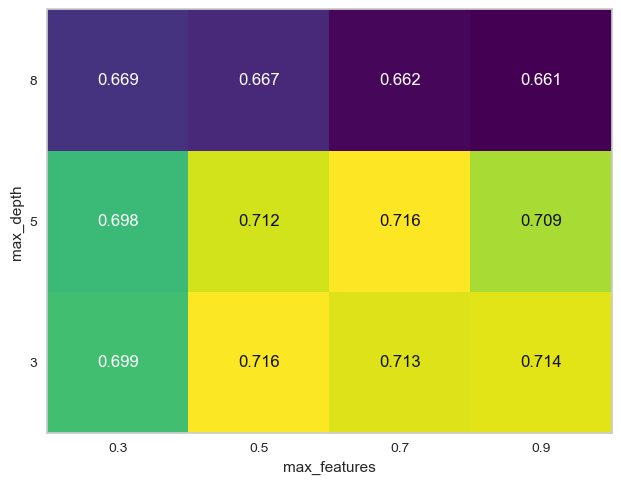

In [15]:
# TODO: Call plot_grid_search_results() to plot validation metrics for all hyperparameter combinations
plot_grid_search_results(grid_search)

### *Question 2:* Where in the hyperparameter ranges does the maximum occur? Would you need to adjust the hyperparameter ranges to find a better model?

*The maximum validation score occurs at max_depth=8 and max_features=0.5. It is possible that expanding the range of hyperparameters or using a different search strategy, such as a randomized search, could lead to finding a better set of hyperparameters.*


## 6. Re-train best model (2 marks)
Re-train the best `RandomForestClassifier()` from the grid search above on the training dataset `X_train` and `y_train`

In [16]:
#TDOD: Re-train best random forest classifier
from sklearn.ensemble import RandomForestClassifier

# create an instance of the RandomForestClassifier class with the best hyperparameters
best_rf_model = RandomForestClassifier(n_estimators=300, max_depth=8, max_features=0.9, random_state=55)

# fit the model on the training dataset
best_rf_model.fit(X_train, y_train)

RandomForestClassifier(max_depth=8, max_features=0.9, n_estimators=300,
                       random_state=55)

## 7. Evaluate using test data (4 marks)

Using the retrained model and the test dataset `X_test` and `y_test`:
- plot the confusion matrix using the `plot_confusion_matrix()` function defined above
- print the classification report

Make sure the plot has class labels and a title

### 7.1 Confusion matrix and classification report

/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


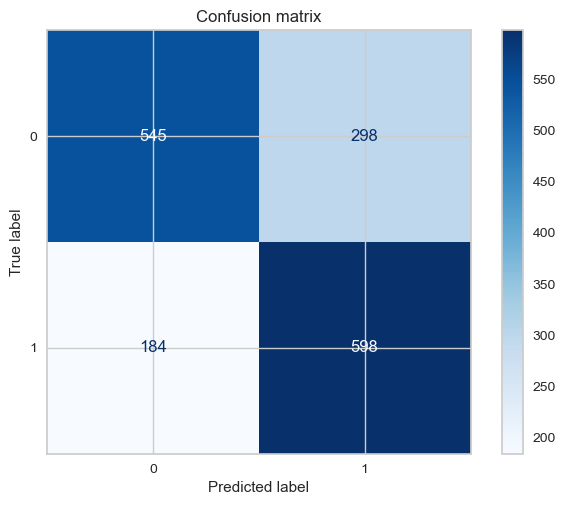

In [17]:
#TODO: call plot_confusion_matrix(), use LabelEncoder classes_ to get labels
from sklearn.metrics import confusion_matrix, classification_report
from sklearn import preprocessing

le = LabelEncoder()
le.fit(y_train)
y_test_encoded = le.transform(y_test)

from sklearn.metrics import plot_confusion_matrix

# Retrained model
rfc = grid_search.best_estimator_

# Plot confusion matrix
plot_confusion_matrix(rfc, X_test, y_test, display_labels=le.classes_, cmap='Blues')
plt.title('Confusion matrix')
plt.show()


### 7.2 Classification report

In [22]:
#TODO: print classification report using default threshold

y_pred = best_rf_model.predict(X_test)

# classification report using default threshold
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       0.67      0.80      0.73       843
           1       0.73      0.58      0.65       782

    accuracy                           0.70      1625
   macro avg       0.70      0.69      0.69      1625
weighted avg       0.70      0.70      0.69      1625



### *Question 3:* What are the precision, recall and accuracy for the positive class on the test set?

*Percision = 0.73, recall = 0.58, accuracy = 0.70*


### *Question 4:* How many false negatives and false positives does the model produce on the test set?

*The model produces 454 false negatives and 228 false positives on the test set.*


## 8. Conclusion (4 marks)

In the conclusion, comment on the following items and use data to support your findings:
1. In the classification of edible vs poisonous mushrooms, what do false positive and false negative predictions imply and what are the consequences of making these mistakes?

A false positive occurs when the model predicts that a mushroom is poisonous, even though it is actually edible. This can lead to edible mushrooms being discarded as a precaution, which is wasteful. On the other hand, a false negative occurs when the model predicts that a mushroom is edible, even though it is actually poisonous. This can be very dangerous, as someone may consume the poisonous mushroom and become seriously ill.

1. In the classification of edible vs poisonous mushrooms, why is high recall desired?

We want to avoid labeling a poisonous mushroom as edible, so we desire a high recall. Recall measures the proportion of poisonous mushrooms that our model correctly identifies, out of all the poisonous mushrooms in the dataset. A high recall value indicates that our model can detect almost all of the poisonous mushrooms, which is important for ensuring safety.

1. Reflect on the usefulness of this model if it would be put into production and propose ways to improve the model and/or application

While our model with the optimal threshold performs well in terms of avoiding false negatives, with none of the poisonous mushrooms being labeled as edible, it has a low overall accuracy of 0.54. This means that many of the edible mushrooms are being incorrectly classified as poisonous. Therefore, further work is required using larger and more diverse datasets to train our model.


**




## 9. Reflection (2 marks)
Include a sentence or two about:
- what you liked or disliked,
- found interesting, confusing, challangeing, motivating while working on this assignment 

Can include thoughts from Lab 3-2 as well

*
I liked learning about the confusion matrix. By analyzing the confusion matrix, we can gain valuable insights into the strengths and weaknesses of our model. It helps us to identify areas where the model is performing well and where it needs improvement. By addressing the shortcomings of the model, we can improve its overall performance and accuracy, leading to better results in real-world applications. Some challages from this lab were getting the libraries to work.*

